In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
len(os.listdir('./lab2-图像压缩/Images/airplane/'))

100

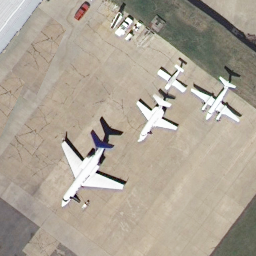

In [3]:
image = Image.open("./lab2-图像压缩/Images/airplane/airplane00.tif")
image

In [18]:
image_array = np.array(image)
(M, N, P) = image_array.shape

## PCA decomposition in sklearn

In [31]:
n = 50
decompressed_data = np.zeros((M, N, P), dtype=np.uint8)

scale = preprocessing.StandardScaler(with_std=False)

pca = PCA(n_components=n)

for i in range(P):
    # get the R,G,B matrix(256 * 256) respectively, then decompress the matrix
    tmp_data = image_array[:,:,i]
    
    # standardize data by substracting the mean of each feature
    scaled_data = scale.fit_transform(tmp_data) 
    
    # project the data into principal components
    pca_data = pca.fit_transform(scaled_data)
    
    # inverse transform the decompressed data to original scale
    reconstructed_pixels = np.uint8(pca.inverse_transform(pca_data) + scale.mean_)
    assert reconstructed_pixels.shape == (M, N)
    
    decompressed_data[:,:,i] = reconstructed_pixels
    

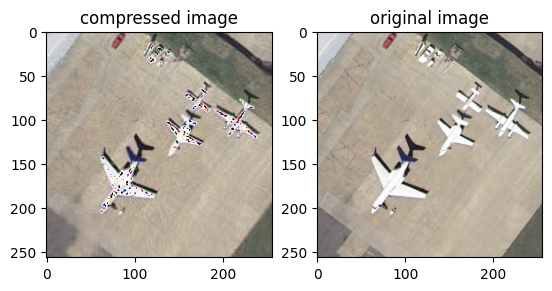

In [32]:
plt.subplot(1,2,1)
plt.imshow(decompressed_data)
plt.title("compressed image")

plt.subplot(1,2,2)
plt.title("original image")
plt.imshow(image_array)

##  achieving the image decomposition manually

In [33]:
import numpy as np

np.random.seed(100)

def power_method(matrix, num_iterations=100):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = []

    for _ in range(n):
        # Step 1: Initialize a non-zero vector as the initial estimate of the eigenvector
        v = np.random.rand(n)
        
        for _ in range(num_iterations):
            # Step 2: Iteration
            w = np.dot(matrix, v)
            v = w / np.linalg.norm(w)

        # Step 3: Compute eigenvalue estimate
        eigenvalue = np.dot(v, np.dot(matrix, v)) / np.dot(v, v)

        # Store eigenvalue and eigenvector
        eigenvalues.append(eigenvalue)
        eigenvectors.append(v)

        # Deflate the matrix
        matrix = matrix - eigenvalue * np.outer(v, v)

    return eigenvalues, eigenvectors

In [34]:
manual_compressed_data = np.zeros((M, N, P), dtype=np.uint8)


# iterator
for i in range(P):
    pixels_data = image_array[:,:,i]
    # standard the data
    mean_value = np.mean(pixels_data, axis=0)
    scaled_data = tmp_data - mean_value
    
    # compute eigenvalues and eigenvectors
    eigenValues, eigenVectors = power_method(pixels_data.T @ pixels_data)
    V = np.zeros((N, n)) # transformation matrix
    for _ in range(n):
        V[:, _] = eigenVectors[_]
    assert V.shape == (N, n) # each column is a principal component
    
    # project the data into the principal components
    compressed_data = scaled_data @ V
    
    # inverse 
    inversed_data = np.uint8(compressed_data @ V.T + mean_value) 
    assert inversed_data.shape == (M, N)
    
    # merge
    manual_compressed_data[:, :, i] = inversed_data

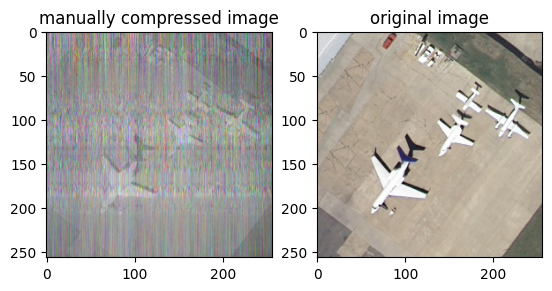

In [35]:
plt.subplot(1,2,1)
plt.title("manually compressed image")
plt.imshow(manual_compressed_data)

plt.subplot(1,2,2)
plt.title("original image")
plt.imshow(image_array)

plt.show()

In [36]:
# standardize the data
image_G = image_array[:,:,1]
mean_G = np.mean(image_G, axis=0)
scaled_data = image_G - mean_G
scaled_data

array([[ 55.1484375 ,  56.12109375,  53.21484375, ...,  31.71875   ,
         34.07421875,  31.94921875],
       [ 53.1484375 ,  56.12109375,  49.21484375, ...,  27.71875   ,
         32.07421875,  31.94921875],
       [ 57.1484375 ,  49.12109375,  52.21484375, ...,  26.71875   ,
         33.07421875,  32.94921875],
       ...,
       [-51.8515625 , -49.87890625, -47.78515625, ..., -42.28125   ,
        -37.92578125, -38.05078125],
       [-49.8515625 , -49.87890625, -56.78515625, ..., -44.28125   ,
        -39.92578125, -40.05078125],
       [-51.8515625 , -51.87890625, -53.78515625, ..., -42.28125   ,
        -40.92578125, -40.05078125]])

In [42]:
# compute eigenvector and eigenvalue of covariance matrix
eigenValues, eigenVectors = power_method(matrix=scaled_data.T@scaled_data)
print(f"eigenvalue = {eigenValues}")

V = np.zeros((N, n))
for i in range(n):
    V[:, i] = eigenVectors[i]

assert V.shape == (N, n)
    
# for test
print()
num_eigenValues, num_eigenVector = np.linalg.eig(scaled_data@scaled_data)
print(np.sort(num_eigenValues)[::-1][:20])

eigenvalue = [20361809.95945995, 13383900.059640804, 5485070.603480652, 4314561.5360585535, 3276620.1189590776, 3004394.4318221943, 2622063.0222744327, 2577170.9589179563, 2285000.87614464, 1875956.8196913577, 1675031.1452679667, 1526838.9407273163, 1293695.2727904473, 1211470.2384049615, 1073516.1125085454, 965996.7841062404, 863673.2803452967, 766179.2007577033, 714358.868625896, 674264.3726170013, 630749.4296403616, 543987.3893928463, 530037.1219203493, 508894.88765338145, 459008.3744419142, 428057.00284185924, 366096.32871878333, 346402.4778130234, 322622.9532021605, 315496.24520815664, 296113.638116509, 281850.2800051726, 276987.7872779677, 258503.15489165028, 233477.6420767503, 232251.19753992523, 220595.28476120956, 209709.59761875446, 202011.20602022065, 192443.43670023832, 170105.94116329265, 166642.43628432322, 156671.18708469358, 152288.5331683572, 144163.58003210157, 131178.0708358754, 128683.16642312652, 123130.30560676327, 117391.00995473647, 107087.95602460211]

[9579695

In [43]:
# project the data into the eigenvector
compressed_data = scaled_data @ V

assert compressed_data.shape == (256, 50)

In [44]:
# inverse transform

inversed_data = np.uint8(compressed_data @ V.T + mean_G)

In [45]:
inversed_data

array([[219, 217, 216, ..., 174, 170, 170],
       [218, 215, 214, ..., 170, 169, 170],
       [209, 207, 208, ..., 163, 164, 163],
       ...,
       [104, 108, 109, ...,  97,  99, 104],
       [ 99, 104, 105, ...,  96,  97, 101],
       [ 97, 102, 104, ...,  95,  94,  99]], dtype=uint8)

In [46]:
np.mean(image_array, axis=0).shape

(256, 3)

In [47]:
test = np.array([[[1,2], [2,3]], [[2,3], [0,0]], [[100,203], [203,32]]])
print(test)
np.sum(test, axis=0)

[[[  1   2]
  [  2   3]]

 [[  2   3]
  [  0   0]]

 [[100 203]
  [203  32]]]


array([[103, 208],
       [205,  35]])

## Reference

- [bilibili(explain why we standard data)](https://www.bilibili.com/video/BV1X54y1R7g7/?spm_id_from=333.337.search-card.all.click&vd_source=4d8586f3dded416b864b75d3304fb8ef)
- [statQuest]()